In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('ipl.csv')
df.shape

(76014, 15)

In [3]:
df.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
cols_to_drop = ['mid','striker','non-striker','venue','batsman','bowler']
df.drop(labels=cols_to_drop,axis=1,inplace=True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
selected_teams = ['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals','Mumbai Indians','Sunrisers Hyderabad','Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans']
df['bat_team'].isin(selected_teams) & df['bowl_team'].isin(selected_teams)

0         True
1         True
2         True
3         True
4         True
         ...  
76009    False
76010    False
76011    False
76012    False
76013    False
Length: 76014, dtype: bool

In [10]:
data = df[df['bat_team'].isin(selected_teams) & df['bowl_team'].isin(selected_teams)]
data.head()
data.shape

(39516, 9)

In [13]:
data = data [data ['overs']> 6.0 ]
#data_1 = data [data ['ball']> 6.0 ]
data['overs'].unique()


array([ 6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  9.1,  9.2,  9.3,  9.4,
        9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 11.1, 11.2, 11.3,
       11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 15.1,
       15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6,
       17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5,
       18.6, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 12. ,  7. , 19. , 15. ,
       18. , 11. , 14. ,  9. , 13. , 16. , 17. ,  8. , 10. ])

In [15]:
#Check for null value percentage
data.isnull().mean()*100

date              0.0
bat_team          0.0
bowl_team         0.0
runs              0.0
wickets           0.0
overs             0.0
runs_last_5       0.0
wickets_last_5    0.0
total             0.0
dtype: float64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27449 entries, 38 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            27449 non-null  object 
 1   bat_team        27449 non-null  object 
 2   bowl_team       27449 non-null  object 
 3   runs            27449 non-null  int64  
 4   wickets         27449 non-null  int64  
 5   overs           27449 non-null  float64
 6   runs_last_5     27449 non-null  int64  
 7   wickets_last_5  27449 non-null  int64  
 8   total           27449 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.1+ MB


In [20]:
#formating the field date
import datetime 
data['date'] = data['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27449 entries, 38 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            27449 non-null  datetime64[ns]
 1   bat_team        27449 non-null  object        
 2   bowl_team       27449 non-null  object        
 3   runs            27449 non-null  int64         
 4   wickets         27449 non-null  int64         
 5   overs           27449 non-null  float64       
 6   runs_last_5     27449 non-null  int64         
 7   wickets_last_5  27449 non-null  int64         
 8   total           27449 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 2.1+ MB


In [21]:
data.head() 


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [22]:
model_data = pd.get_dummies(data=data,columns=['bat_team','bowl_team'])
model_data.head(2)
model_data.info()
# Example using pandas get_dummies for one-hot encoding
# Identify categorical columns
categorical_columns = model_data.select_dtypes(include=['object']).columns

# One-hot encode all categorical columns
model_data = pd.get_dummies(model_data, columns=categorical_columns)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 27449 entries, 38 to 75888
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   27449 non-null  datetime64[ns]
 1   runs                                   27449 non-null  int64         
 2   wickets                                27449 non-null  int64         
 3   overs                                  27449 non-null  float64       
 4   runs_last_5                            27449 non-null  int64         
 5   wickets_last_5                         27449 non-null  int64         
 6   total                                  27449 non-null  int64         
 7   bat_team_Chennai Super Kings           27449 non-null  uint8         
 8   bat_team_Kings XI Punjab               27449 non-null  uint8         
 9   bat_team_Kolkata Knight Riders         27449 non-null  uint8

In [26]:
#splitting the data into train and test
# Assuming 'date' is a datetime column in your DataFrame                                           #testing  data is to validate the trianing of data.
x_train = model_data.drop(labels='total', axis=1)[model_data['date'].dt.year <= 2016]
x_test = model_data.drop(labels='total', axis=1)[model_data['date'].dt.year >= 2017]
y_train = model_data[model_data['date'].dt.year <= 2016]['total'].values
y_test = model_data[model_data['date'].dt.year >= 2017]['total'].values

In [27]:
#once we split the data then we drop the date because it can throw an error
x_train.drop(labels='date',axis=1,inplace=True)
x_test.drop(labels='date',axis=1,inplace=True)

In [28]:
x_train.head()
x_test.head()
y_train
y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [186]:
# xtrain goes though all the independent variables and analyses it by comparing with ytrain.
#Lasso regression, or LASSO (Least Absolute Shrinkage and Selection Operator), is a linear regression technique used in statistical modeling and machine learning. It is a type of regularized linear regression that adds a penalty term to the linear regression objective function to prevent overfitting and encourage feature selection.

In [29]:
#Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [30]:
lasso = Lasso()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3,1,5,10,20,30,35,40]}                                                                   #alpha is the regularization parameter lower the value of alpha better is the model.

In [31]:
#GridSearch
lasso_reg = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

In [32]:
lasso_reg.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 1, 5, 10, 20, 30,
                                   35, 40]},
             scoring='neg_mean_squared_error')

In [33]:
print(lasso_reg.best_params_)

{'alpha': 1}


In [34]:
#Building the model with best parameters
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [36]:
#model prediction
y_pred = lasso.predict(x_test)
y_pred 

array([179.53118381, 178.81535832, 178.63990956, ..., 107.61291403,
       106.6231575 , 101.34917376])

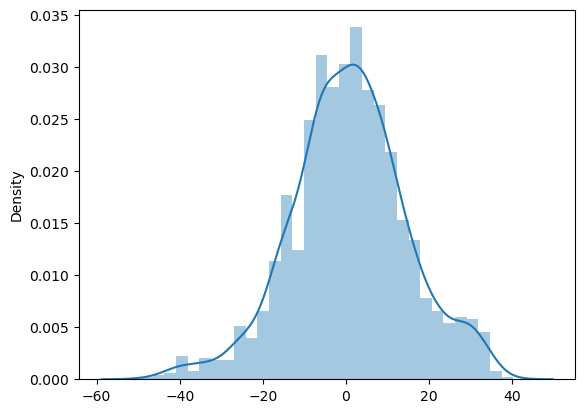

In [37]:
# dist plot for difference 
sns.distplot(y_test-y_pred)   #y_test is actual value and y_pred is predicted value (value =data of y_test-y_pred)
plt.show()

In [42]:
print(y_test[1]-y_pred[1])


28.184641675564166


In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

MAE: 10.868365509663692
MSE: 197.01543671678604
RMSE: 14.036218747112274
MAPE: 6.84757703870681


In [61]:
# Finding accuracy of the model
print("Accuracy: ",metrics.r2_score(y_test, y_pred))

Accuracy:  0.7773904863566735


In [48]:
import tpot
print(tpot.__version__)

0.12.1


In [49]:
print(dir(tpot)) #to get all the functions(tpot

['TPOTClassifier', 'TPOTRegressor', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'base', 'builtins', 'config', 'decorators', 'driver', 'export_utils', 'gp_deap', 'gp_types', 'main', 'metrics', 'operator_utils', 'tpot']


In [50]:
#regression problem 
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold

In [51]:
#data evaluation procedure
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=42)

In [52]:
# define the model
model = TPOTRegressor(generations=5, population_size=50,scoring='neg_mean_squared_error' ,verbosity=3, random_state=42,cv = cv)

In [53]:
model.fit(x_train, y_train)

30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.

Generation 1 - Current Pareto front scores:

-1	-75.86931252115704	RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.5, RandomForestRegressor__min_samples_leaf=2, RandomForestRegressor__min_samples_split=17, RandomForestRegressor__n_estimators=100)
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute

TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=3, random_state=42),
              generations=5, population_size=50, random_state=42,
              scoring='neg_mean_squared_error', verbosity=3)

In [54]:
print(model.score(x_test, y_test))

-315.8382479659551


In [55]:
model.fitted_pipeline_

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.45,
                                       min_samples_split=3, random_state=42))])

In [56]:
pred_automl = model.predict(x_test)

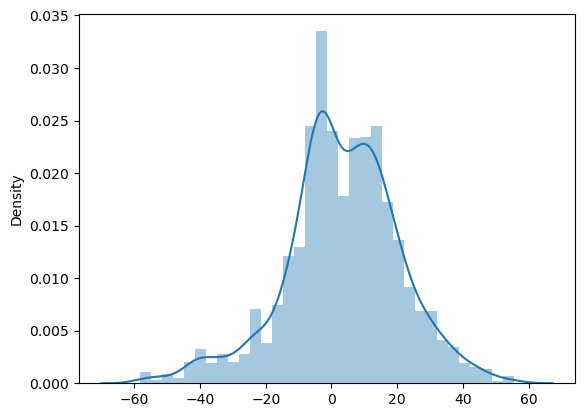

In [60]:
#dist plot for difference
sns.distplot(y_test-pred_automl)
plt.show()

In [63]:
# Finding accuracy of the model
print("Accuracy: ",metrics.r2_score(y_test, pred_automl))

Accuracy:  0.643131523390567
